In [1]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [13]:
#載入路透社資料集
from keras.datasets import reuters
#將資料量限制在10000個最常出現的單字
(train_data,train_labels),(test_data,test_labels)=reuters.load_data(num_words=10000)

In [14]:
#檢視資料
len(train_data)

8982

In [15]:
len(test_data)

2246

In [31]:
#對資料進行向量化處理
def vectorize_sequences(sequences,dimension=10000):
  results=np.zeros(((len(sequences)),dimension))
  for i,sequence in enumerate(sequences):
    results[i,sequence]=1.
  return results

x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

In [28]:
#將標籤進行向量化處理
#使用one-hot編碼
from keras.utils.np_utils import to_categorical
one_hot_train_labels=to_categorical(train_labels)
one_hot_test_labels=to_categorical(test_labels)

In [70]:
#模型定義
from keras import models
from keras import layers
model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

In [71]:
#檢視模型
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 64)                640064    
_________________________________________________________________
dense_64 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_65 (Dense)             (None, 46)                2990      
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [34]:
#切出1000個樣本當作驗證資料集
x_val=x_train[:1000]
partial_x_train=x_train[1000:]
y_val=one_hot_train_labels[:1000]
partial_y_train=one_hot_train_labels[1000:]

In [35]:
#訓練模型
history=model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 0s 29ms/step - loss: 2.6963 - accuracy: 0.4529 - val_loss: 1.8023 - val_accuracy: 0.6220
Epoch 2/20
16/16 [==============================] - 0s 14ms/step - loss: 1.4636 - accuracy: 0.7052 - val_loss: 1.3397 - val_accuracy: 0.7090
Epoch 3/20
16/16 [==============================] - 0s 14ms/step - loss: 1.0798 - accuracy: 0.7747 - val_loss: 1.1590 - val_accuracy: 0.7550
Epoch 4/20
16/16 [==============================] - 0s 15ms/step - loss: 0.8561 - accuracy: 0.8247 - val_loss: 1.0830 - val_accuracy: 0.7650
Epoch 5/20
16/16 [==============================] - 0s 14ms/step - loss: 0.6923 - accuracy: 0.8562 - val_loss: 0.9923 - val_accuracy: 0.8030
Epoch 6/20
16/16 [==============================] - 0s 14ms/step - loss: 0.5532 - accuracy: 0.8831 - val_loss: 0.9414 - val_accuracy: 0.8100
Epoch 7/20
16/16 [==============================] - 0s 14ms/step - loss: 0.4478 - accuracy: 0.9060 - val_loss: 0.9702 - val_accuracy: 0.7950
Epoch 8/20
16

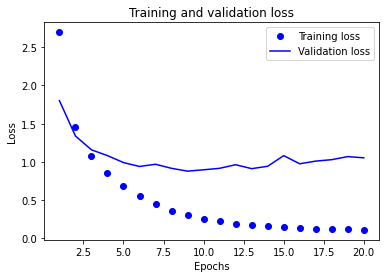

In [38]:
#繪製訓練與驗證資料的損失分數
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

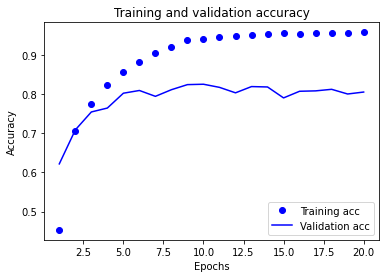

In [39]:
#繪製訓練與驗證資料的準確度
plt.clf()
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [52]:
#重新訓練模型
model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(partial_x_train,partial_y_train,epochs=9,batch_size=512,validation_data=(x_val,y_val))

results=model.evaluate(x_test,one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 0s 22ms/step - loss: 2.6285 - accuracy: 0.5122 - val_loss: 1.7503 - val_accuracy: 0.6120
Epoch 2/9
16/16 [==============================] - 0s 14ms/step - loss: 1.4081 - accuracy: 0.7058 - val_loss: 1.2896 - val_accuracy: 0.7180
Epoch 3/9
16/16 [==============================] - 0s 14ms/step - loss: 1.0327 - accuracy: 0.7798 - val_loss: 1.1087 - val_accuracy: 0.7710
Epoch 4/9
16/16 [==============================] - 0s 14ms/step - loss: 0.8096 - accuracy: 0.8310 - val_loss: 1.0228 - val_accuracy: 0.7770
Epoch 5/9
16/16 [==============================] - 0s 14ms/step - loss: 0.6562 - accuracy: 0.8651 - val_loss: 0.9519 - val_accuracy: 0.7980
Epoch 6/9
16/16 [==============================] - 0s 14ms/step - loss: 0.5234 - accuracy: 0.8930 - val_loss: 0.9160 - val_accuracy: 0.8110
Epoch 7/9
16/16 [==============================] - 0s 14ms/step - loss: 0.4234 - accuracy: 0.9148 - val_loss: 0.8992 - val_accuracy: 0.8060
Epoch 8/9
16/16 [===

In [53]:
#顯示最終結果
results

[0.9937385320663452, 0.784060537815094]